Исходные данные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

table = pd.read_csv("laptop_price.csv",delimiter=',')
table = table.drop(['Price_euros'], axis = 1)
table

,Product,Weight
0,17-Y002nv (A10-9600P/6GB/2TB/Radeon,2.65
1,IdeaPad 310-15ABR,2.40
2,Aspire 5,2.20
3,17-ak002nv (A10-9620P/6GB/2TB/Radeon,2.71
4,X555QG-DM242T (A10-9620P/4GB/1TB,2.20
...,...,...
107,IdeaPad 110-15IBR,2.20
108,Aspire E5-774G,3.30
109,Aspire ES1-572,2.40
110,Inspiron 3567,2.25


Ранжированный ряд

In [2]:
sortTable = table.sort_values('Weight')
sortTable

,Product,Weight
46,Yoga Book,0.69
39,Vivobook E200HA,0.98
83,VivoBook Flip,1.10
80,VivoBook E12,1.10
94,Lenovo IdeaPad,1.15
...,...,...
12,17-ak001nv (A6-9220/4GB/500GB/Radeon,2.71
3,17-ak002nv (A10-9620P/6GB/2TB/Radeon,2.71
9,IdeaPad 110-17ACL,2.80
37,Rog Strix,3.20


Вариационный ряд

In [3]:
sortTable['m_i'] = sortTable.groupby('Weight')['Weight'].transform('count')
sortTable= sortTable.drop_duplicates(subset=['Weight']).reset_index(drop = True)
sortTable['p*_i'] = sortTable['m_i']/sum(sortTable['m_i'])
sum_row = {'Product': 'ПРОВЕРКА','Weight':'', 'm_i': sum(sortTable['m_i']), 'p*_i': sum(sortTable['p*_i'])}
sortTable.append(sum_row, ignore_index=True)

,Product,Weight,m_i,p*_i
0,Yoga Book,0.69,1,0.008929
1,Vivobook E200HA,0.98,1,0.008929
2,VivoBook Flip,1.1,2,0.017857
3,Lenovo IdeaPad,1.15,2,0.017857
4,FlexBook Edge,1.16,1,0.008929
5,Stream 11-Y000na,1.17,1,0.008929
6,Chromebook C202SA,1.2,3,0.026786
7,K146 (N3350/4GB/32GB/W10),1.22,1,0.008929
8,Spin SP111-31,1.25,5,0.044643
9,K147 (N3350/4GB/32GB/FHD/W10),1.3,2,0.017857


Интервальный ряд

In [4]:
sortTable
n = sortTable['Product'].size
print('n=',n)
k = 1 + (np.log2(sortTable['Product'].size))//1
print('k=',k)
max_x = sortTable['Weight'].max()
min_x = sortTable['Weight'].min()
print('max_x=', max_x)
print('min_x=', min_x)
h = round((max_x - min_x)/k,3)
print('округлим h до 0.5, получим перебор = 0,065 => за 6 интервалов перебор будет = 0.39, отступим влево от min_x половину этого пребора')
print('h=',h)
h_new = 0.5
print('h_new=',h_new)
x0 = round(min_x - 0.39/2,3)
print('x0=',x0)
borders = []
for i in range(7):
    borders.append(x0+ i*h_new)
print(borders,'-границы промежутков')
size = 0
mi = []
for j in range(6):
    tmp = sortTable['Weight'].between(borders[j], borders[j+1], inclusive='right').tolist()
    for i in range(len(tmp)):
        if tmp[i]:
            size+=1
    mi.append(size)
    size = 0
print(mi, '- абсолютные частоты интервального ряда')
print(sum(mi), '- проверяем, что сумма не изменилась, значит частоты посчитаны верно')
rangeTable = pd.DataFrame(data={'Промежуток': ['0.495, 0.995','0.995, 1.495', '1.495, 1.995' ,'1.995, 2.495', '2.495, 2.995', '2.995, 3.495'], 'mi': mi})
print('\n')
rangeTable['pi'] = round(rangeTable['mi']/n,4)
print(rangeTable)
print('\nнайдем сумму относительных частот:')
print(round(sum(rangeTable['pi']),3),'- частоты посчитаны верно')
xi=[]
print('\n')
for i in range(6):
    xi.append((borders[i] + borders[i+1])/2)
print(xi, ' - середины промежутков')


n= 43
k= 6.0
max_x= 3.3
min_x= 0.69
округлим h до 0.5, получим перебор = 0,065 => за 6 интервалов перебор будет = 0.39, отступим влево от min_x половину этого пребора
h= 0.435
h_new= 0.5
x0= 0.495
[0.495, 0.995, 1.495, 1.995, 2.495, 2.995, 3.495] -границы промежутков
[2, 12, 11, 11, 5, 2] - абсолютные частоты интервального ряда
43 - проверяем, что сумма не изменилась, значит частоты посчитаны верно


     Промежуток  mi      pi
0  0.495, 0.995   2  0.0465
1  0.995, 1.495  12  0.2791
2  1.495, 1.995  11  0.2558
3  1.995, 2.495  11  0.2558
4  2.495, 2.995   5  0.1163
5  2.995, 3.495   2  0.0465

найдем сумму относительных частот:
1.0 - частоты посчитаны верно


[0.745, 1.245, 1.745, 2.245, 2.745, 3.245]  - середины промежутков


Полигон абсолютных частот

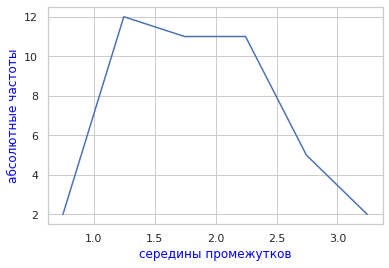

In [5]:
plt.ylabel('абсолютные частоты', fontsize=12, color='blue')
plt.xlabel('середины промежутков', fontsize=12, color='blue')
plt.plot(xi,rangeTable['mi'])
plt.show()

Полигон относительных частот

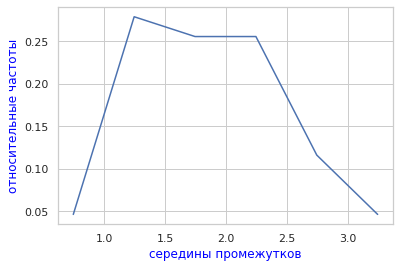

In [6]:
plt.ylabel('относительные частоты', fontsize=12, color='blue')
plt.xlabel('середины промежутков', fontsize=12, color='blue')
plt.plot(xi,rangeTable['pi'])
plt.show()

Гистограмма абсолютных частот

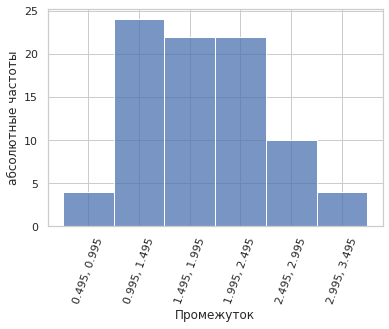

In [7]:
sns.histplot(data=rangeTable, x="Промежуток", weights=rangeTable['mi']/h_new).set_ylabel('абсолютные частоты')
plt.xticks(rotation=70)
plt.show()

Гистограмма относительных частот

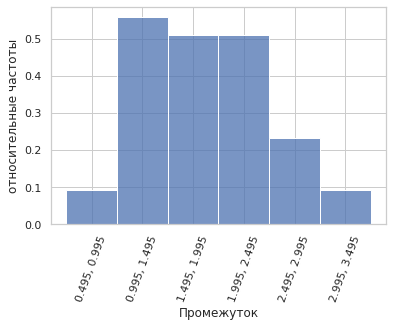

In [8]:
sns.histplot(data=rangeTable, x="Промежуток", weights=rangeTable['pi']/h_new).set_ylabel('относительные частоты')
plt.xticks(rotation=70)
plt.show()

Эмпирическая функция относительных частот

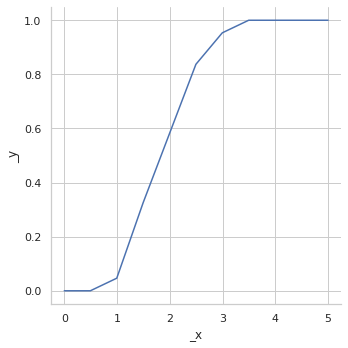

In [14]:
func_p = []
func_m = []
func_km = []
func_kp = []
func_kp.append(0)
func_km.append(0)
func_p.append(0.0)
func_p.append(0.0)
func_m.append(0.0)
func_m.append(0.0)
for i in range(rangeTable['mi'].size):
    func_p.append(sum(rangeTable['pi'][0:i+1]))
    func_m.append(sum(rangeTable['mi'][0:i+1]/43))
    func_kp.append(sum(rangeTable['pi'][0:i+1]))
    func_km.append(sum(rangeTable['mi'][0:i+1]/43))
func_p.append(1.0)
func_m.append(1.0)
mas = []
mas1 = []
mas.append(0)
for i in range(7):
    mas.append(0.495 + 0.5*i)
    mas1.append(0.495 + 0.5*i)
mas.append(5)
sns.relplot(x= mas, y = func_p, kind='line')
plt.show()


Эмпирическая функция абсолютных частот(такая же)

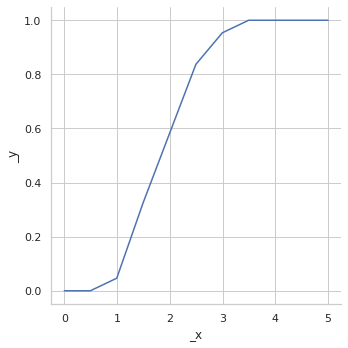

In [10]:
sns.relplot(x= mas, y = func_m, kind='line')
plt.show()

Кумулята(накопленные относительные частоты)

[0, 0.0465, 0.3256, 0.5814, 0.8372, 0.9535, 1.0]


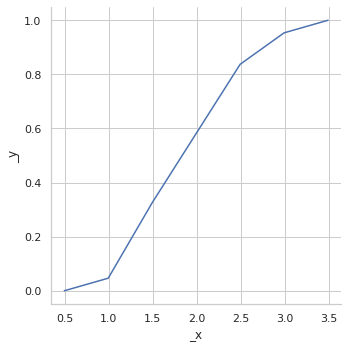

In [11]:
sns.relplot(x= mas1, y = func_kp, kind='line')
plt.show()

Кумулята(накопленные абсолютные частоты)

[0, 2, 14, 25, 36, 41, 43]


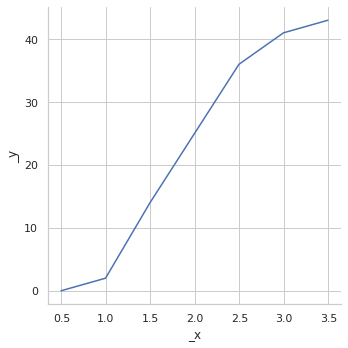

In [15]:
sns.relplot(x= mas1, y = func_km, kind='line')
plt.show()